In [2]:
pip install matplotlib

  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.41.1-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-10.0.0-cp310-cp310-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tqdm

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
import os

# Specify the path to the folder using double backslashes
folder_path = "C:\\Users\\Nikki Chauhan\\Downloads\\archive"

# List all files in the folder
files_in_folder = os.listdir(folder_path)
print(files_in_folder)


['crop_part1', 'UTKFace', 'utkface_aligned_cropped']


In [23]:
import os
import random
from tqdm import tqdm

# Specify the path to the folder using forward slashes or double backslashes
BASE_DIR = r"C:\Users\Nikki Chauhan\Downloads\archive\UTKFace"

age_labels = []
gender_labels = []
image_paths = []

# List all files in the folder
image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
    # Create the full image path by joining the folder path and image filename
    image_path = os.path.join(BASE_DIR, image)

    # Split the image filename to extract age and gender labels (with error handling)
    img_components = image.split('_')
    try:
        age_label = int(img_components[0])
        gender_label = int(img_components[1].split('.')[0])  # Remove the file extension from the gender label
    except ValueError:
        # Skip this image if it doesn't follow the expected format
        continue

    # Append the image_path, age_label, and gender_label to their respective lists
    age_labels.append(age_label)
    gender_labels.append(gender_label)
    image_paths.append(image_path)



100%|████████████████████████████████████████████████████████████████████████| 23708/23708 [00:00<00:00, 255531.52it/s]


In [24]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')


Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [25]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [26]:
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

,image_path,age,gender
0,C:\Users\Nikki Chauhan\Downloads\archive\UTKFa...,1,1
1,C:\Users\Nikki Chauhan\Downloads\archive\UTKFa...,38,1
2,C:\Users\Nikki Chauhan\Downloads\archive\UTKFa...,36,1
3,C:\Users\Nikki Chauhan\Downloads\archive\UTKFa...,4,1
4,C:\Users\Nikki Chauhan\Downloads\archive\UTKFa...,1,0


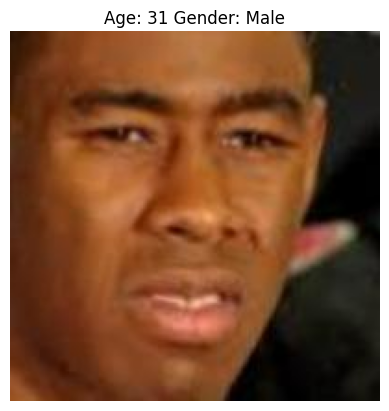

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
if not image_paths:
    print("No image paths found.")
else:
   
    rand_index = random.randint(0, len(image_paths) - 1)

  
    if 0 <= rand_index < len(age_labels) and 0 <= rand_index < len(gender_labels):
        age = age_labels[rand_index]
        gender = gender_labels[rand_index]
        image_path = image_paths[rand_index]

        IMG = Image.open(image_path)

        gender_mapping = {0: 'Male', 1: 'Female'}
        plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
        plt.axis('off')
        plt.imshow(IMG)
        plt.show()
    else:
        print("Invalid index or age/gender labels not available for the selected index.")



<Axes: xlabel='age', ylabel='Density'>

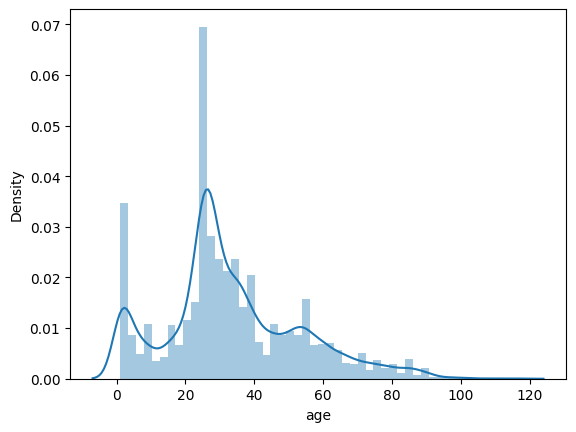

In [28]:
 # Age distribution
 sns.distplot(df['age'])


<Axes: ylabel='count'>

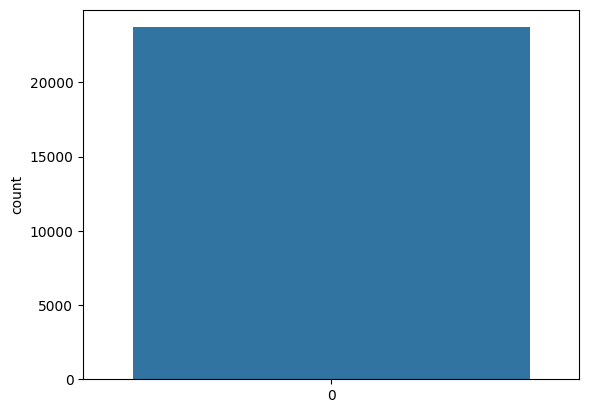

In [29]:
sns.countplot(df['gender'])

In [37]:
import sys
print(sys.executable)
!pip show Pillow




C:\Users\Nikki Chauhan\AppData\Local\Programs\Python\Python310\python.exe
Name: Pillow
Version: 10.0.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Jeffrey A. Clark (Alex)
Author-email: aclark@aclark.net
License: HPND
Location: c:\users\nikki chauhan\appdata\local\programs\python\python310\lib\site-packages
Requires: 
Required-by: matplotlib


In [38]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


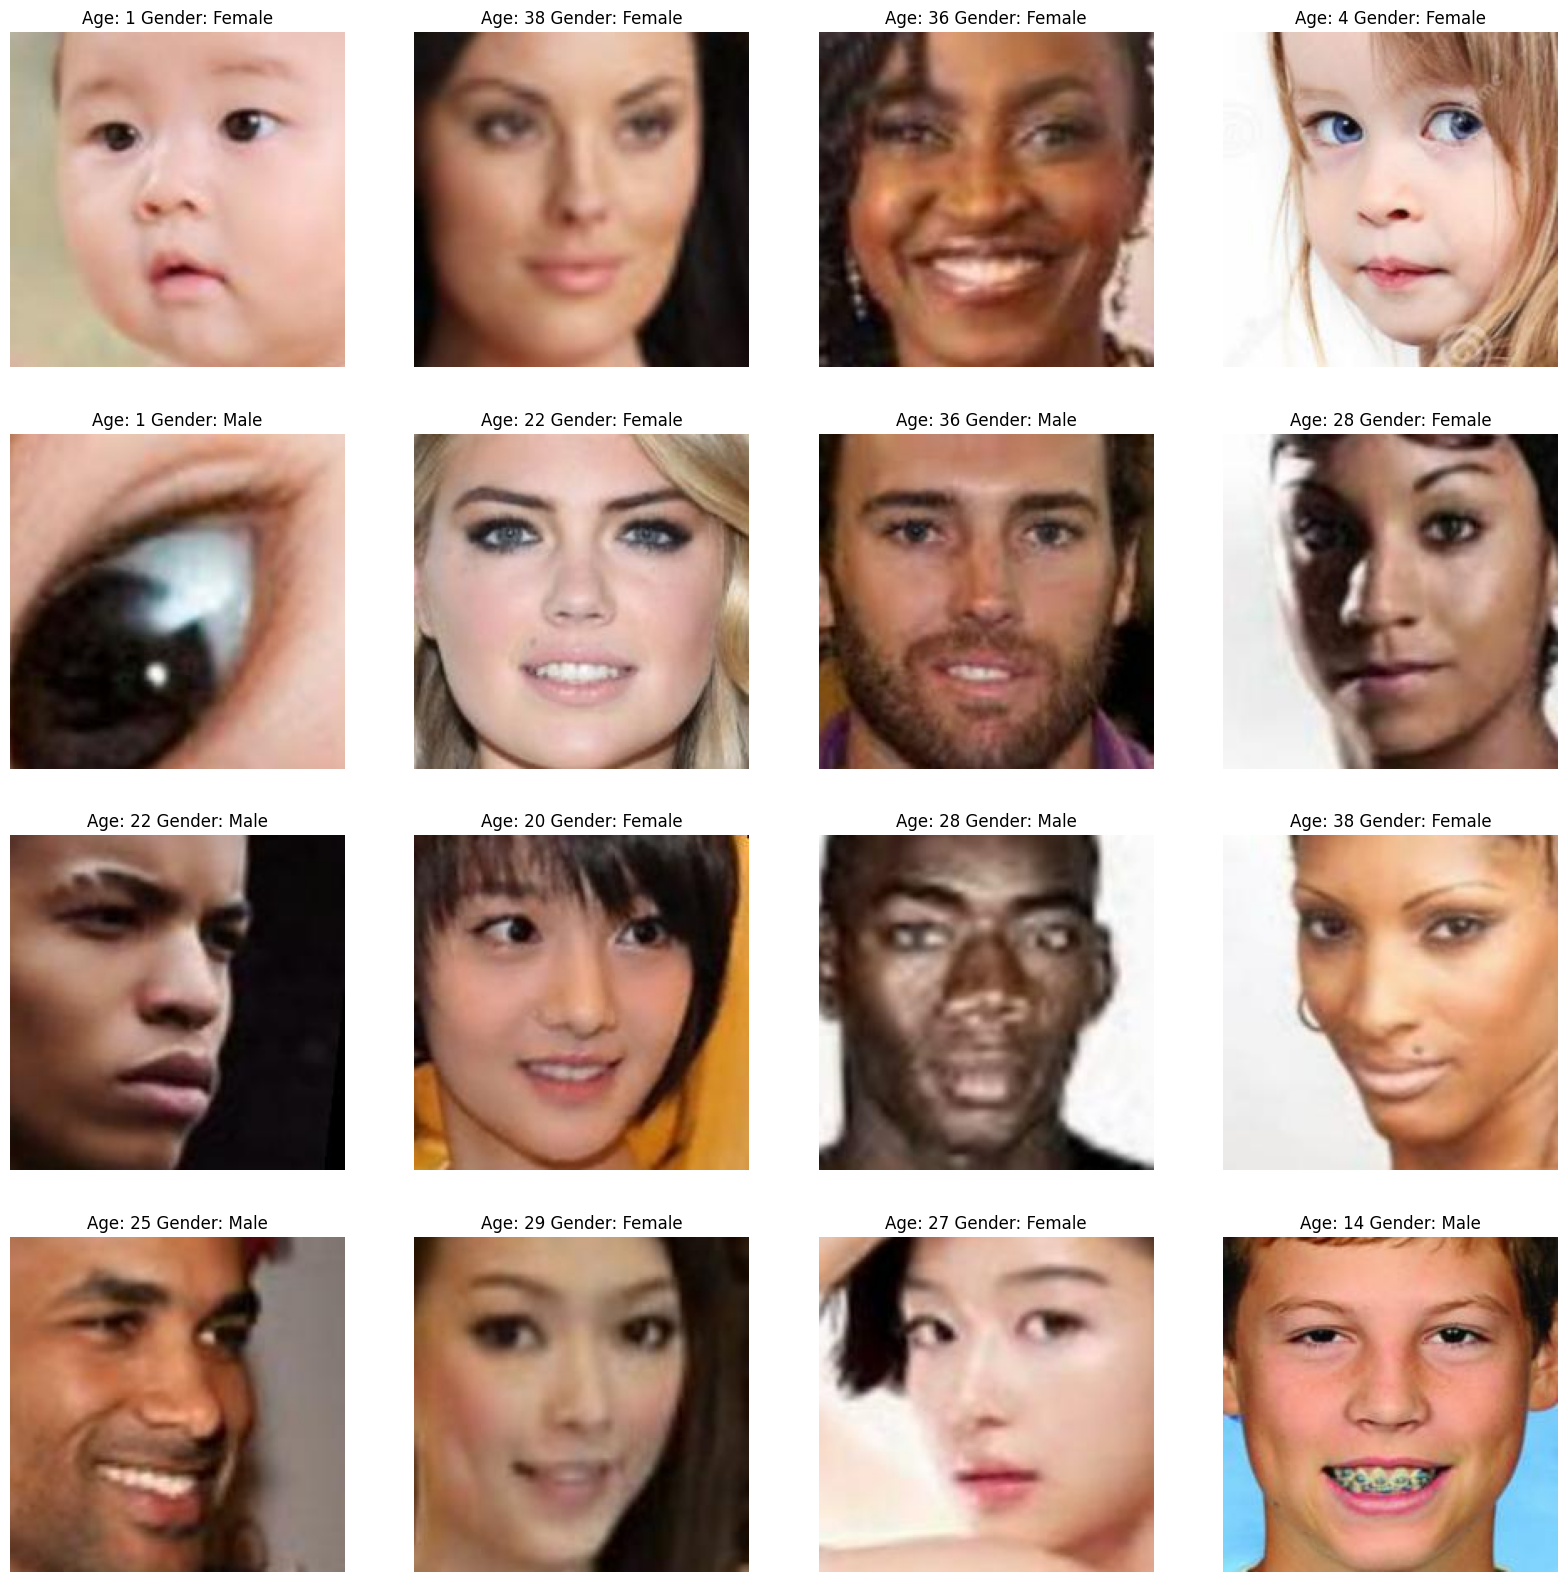

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, row in enumerate(samples.itertuples()):
    sample = row.image_path
    age = row.age
    gender = row.gender

    plt.subplot(4, 4, index + 1)
    img = mpimg.imread(sample)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

plt.show()


In [49]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [55]:
!pip install Pillow

  




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import PIL
print(PIL.__version__)


10.0.0


In [57]:
import sys
print(sys.modules['PIL'])


<module 'PIL' from 'C:\\Users\\Nikki Chauhan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\PIL\\__init__.py'>


In [59]:
import numpy as np
from PIL import Image
from tqdm import tqdm

def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = Image.open(image).convert('L') 
        img = img.resize((128, 128), Image.LANCZOS) 
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

image_path = r"C:\Users\Nikki Chauhan\Downloads\archive\crop_part1\9_1_0_20170109202824646.jpg.chip.jpg"
image_list = [image_path]

X = extract_image_features(image_list)



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.92it/s]


In [60]:
X.shape

(1, 128, 128, 1)

In [61]:
X = X / 255.0

In [63]:
import numpy as np

y_gender = np.array(df['gender'])
y_age = np.array(df['age'])


In [64]:
input_shape = (128, 128, 1)

In [65]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

In [66]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [74]:
print("Shape of X:", X.shape)
print("Shape of y_gender:", y_gender.shape)
print("Shape of y_age:", y_age.shape)


Shape of X: (1, 128, 128, 1)
Shape of y_gender: (23708,)
Shape of y_age: (23708,)


In [71]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import numpy as np
X_new = np.repeat(X, 23708, axis=0)

print(X_new.shape)       
print(y_gender.shape)    
print(y_age.shape)        

# Train the model
history = model.fit(x=X_new, y=[y_gender, y_age], batch_size=32, epochs=10)



(23708, 128, 128, 1)
(23708,)
(23708,)
Epoch 1/10
741/741 [==============================] - 505s 671ms/step - loss: 16.2808 - gender_out_loss: 0.7014 - age_out_loss: 15.5794 - gender_out_accuracy: 0.5177 - age_out_accuracy: 0.0474
Epoch 2/10
741/741 [==============================] - 505s 681ms/step - loss: 15.9776 - gender_out_loss: 0.6923 - age_out_loss: 15.2854 - gender_out_accuracy: 0.5224 - age_out_accuracy: 0.0474
Epoch 3/10
741/741 [==============================] - 431s 582ms/step - loss: 15.9154 - gender_out_loss: 0.6922 - age_out_loss: 15.2232 - gender_out_accuracy: 0.5221 - age_out_accuracy: 0.0474
Epoch 4/10
741/741 [==============================] - 310s 418ms/step - loss: 15.8764 - gender_out_loss: 0.6922 - age_out_loss: 15.1842 - gender_out_accuracy: 0.5227 - age_out_accuracy: 0.0474
Epoch 5/10
741/741 [==============================] - 327s 441ms/step - loss: 15.8842 - gender_out_loss: 0.6922 - age_out_loss: 15.1921 - gender_out_accuracy: 0.5227 - age_out_accuracy: 0.0

In [107]:
print(history.history.keys())


dict_keys(['loss', 'gender_out_loss', 'age_out_loss', 'gender_out_accuracy', 'age_out_accuracy'])


In [118]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

In [131]:
img_to_test = r"C:\Users\pjaga\OneDrive\Desktop\Data Science\Age and Gender Detection System\test images\1.png"
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))








FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pjaga\\OneDrive\\Desktop\\Data Science\\Age and Gender Detection System\\test images\\1.png'